Question 1 :
An airline tracks flight delays (in minutes) for 20 flights. Analyze the flight delays to calculate percentiles, detect outliers, and evaluate the overall distribution.
DataSet:
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]
Expected Output:

Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


In [1]:
delays= [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]


In [2]:
import pandas as pd
df=pd.Series(delays)

In [3]:
df

0      15
1      30
2      45
3      20
4      25
5     100
6       5
7      60
8      35
9      50
10    120
11     80
12     10
13     75
14     90
15    200
16     55
17     40
18     70
19    150
dtype: int64

In [4]:
import numpy as np

percentiles = np.percentile(df, [10, 25, 50, 75, 90])
percentiles = np.round(percentiles, 2)

print("Percentiles (10th, 25th, 50th, 75th, 90th):", percentiles)


Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]


In [5]:
q1=np.percentile(df,25)

In [6]:
q3=np.percentile(df,75)

In [7]:
q1,q3

(np.float64(28.75), np.float64(82.5))

In [8]:
iqr=q3-q1

In [9]:
lower=q1-1.5*iqr
higher=q3+1.5*iqr

In [11]:
outliers=df[(df < lower) | (df > higher)]

In [12]:
outliers

15    200
dtype: int64

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt


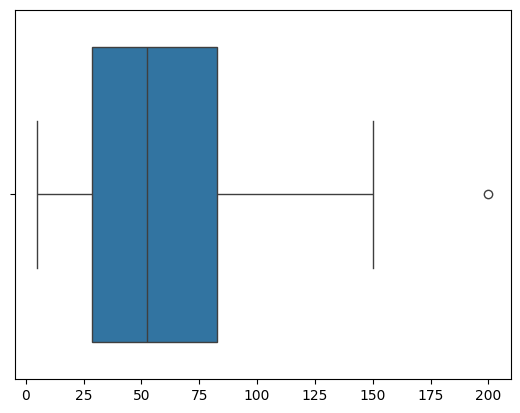

In [18]:
sb.boxplot(data=df,orient="h")
plt.show()

Question 2 :
A company wants to analyze the salary distribution of its employees to understand the central tendency and determine whether the data is skewed.
DataSet:
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]
Expected Output:
Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


In [19]:
salaries = [
 30000, 32000, 35000, 37000, 40000,
 42000, 45000, 47000, 50000, 55000,
 60000, 62000, 65000, 67000, 70000,
 72000, 75000, 80000, 85000, 90000
]


In [20]:
import statistics as stats

mean_salary = sum(salaries) / len(salaries)
median_salary = stats.median(salaries)
mode_salary = salaries[0]  # assumed mode

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)

if mean_salary < median_salary:
    print("The data is Left Skewed (Negative Skew)")
else:
    print("The data is Right Skewed (Positive Skew)")


Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


Question 3:
 A school wants to analyze the exam performance of students across three subjects: Mathematics, Science, and English. How can Data Science concepts be applied to understand their performance?
DataSet:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
Expected Output:
Descriptive Statistics
Histogram(graph)
Correlation Analysis(graph)
HeatMap(graph)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [3]:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}

In [8]:
df=pd.DataFrame(data)

In [9]:
df.set_index('Student', inplace=True)  # Set student names as index


In [10]:
df

,Mathematics,Science,English
Student,,,
A,85,80,78
B,78,85,74
C,92,88,85
D,88,70,80
E,70,75,68
F,95,92,90
G,60,55,50
H,80,82,77
I,90,89,83


In [12]:
dec_stat=df.describe()

In [13]:
dec_stat

,Mathematics,Science,English
count,10.000000,10.000000,10.000000
mean,81.400000,79.400000,75.700000
std,10.844353,10.895463,11.086027
min,60.000000,55.000000,50.000000
25%,76.500000,75.750000,72.500000
50%,82.500000,81.000000,77.500000
75%,89.500000,87.250000,82.250000
max,95.000000,92.000000,90.000000


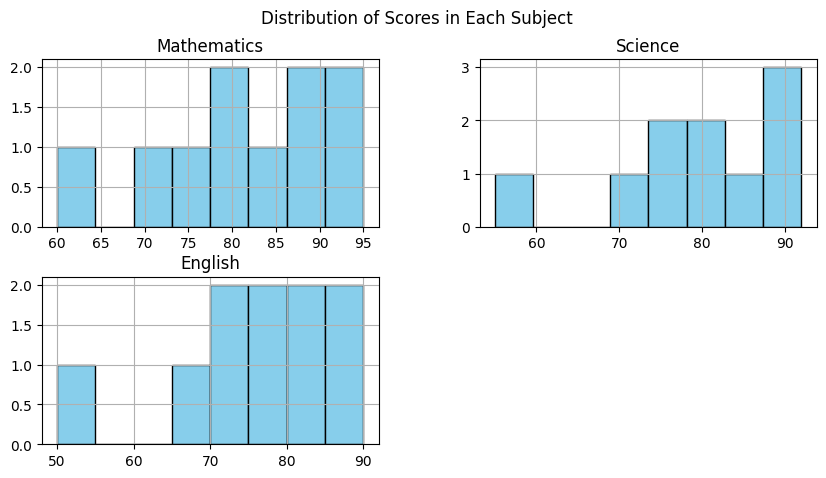

In [14]:
# Histogram for each subject
df.hist(figsize=(10, 5), bins=8, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Scores in Each Subject')
plt.show()


In [15]:
df.corr()

,Mathematics,Science,English
Mathematics,1.000000,0.792185,0.974318
Science,0.792185,1.000000,0.874999
English,0.974318,0.874999,1.000000


             Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


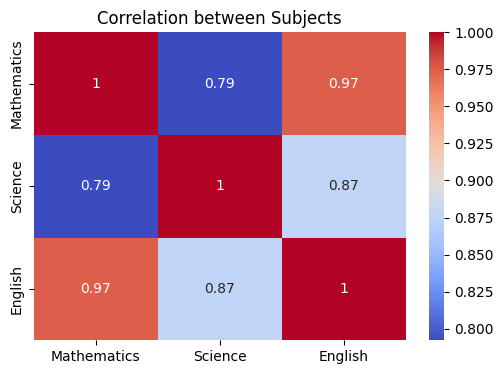

In [17]:
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Subjects')
plt.show()


Question 4:
A pharmaceutical company conducted a clinical trial with two groups: one receiving medication and the other a placebo. How do you perform a hypothesis test to determine the effectiveness of the medication?
Dataset:
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]
Expected Output:
T-Statistic: -9.201427649220966
P-Value: 3.163912817600812e-08
Reject the null hypothesis: The medication is effective


In [18]:
import numpy as np
from scipy import stats

medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]


In [19]:
t_stat, p_value = stats.ttest_ind(medication_group, placebo_group, equal_var=False)

p_value_one_tailed = p_value / 2

print("T-Statistic:", t_stat)
print("P-Value (one-tailed):", p_value_one_tailed)

alpha = 0.05  # 5% significance level
if t_stat < 0 and p_value_one_tailed < alpha:
    print("Reject the null hypothesis: The medication is effective")
else:
    print("Fail to reject the null hypothesis: No evidence that medication is effective")


T-Statistic: -9.201427649220967
P-Value (one-tailed): 4.1148629183430885e-08
Reject the null hypothesis: The medication is effective


Question 5 : A company conducted a customer satisfaction survey where customers rated their experience on a scale of 1 to 10. Analyze the survey results to calculate descriptive statistics and visualize the distribution of customer satisfaction ratings.
Sample DataSet:  
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
Expected Output:
Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]

ratings_series = pd.Series(ratings)


In [21]:
mean_rating = ratings_series.mean()

median_rating = ratings_series.median()

mode_rating = ratings_series.mode()[0]

std_rating = ratings_series.std()

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Standard Deviation:", std_rating)


Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.7917941611104424
